<a href="https://colab.research.google.com/github/itinho0712/Learnship/blob/main/trackback_investmentportfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

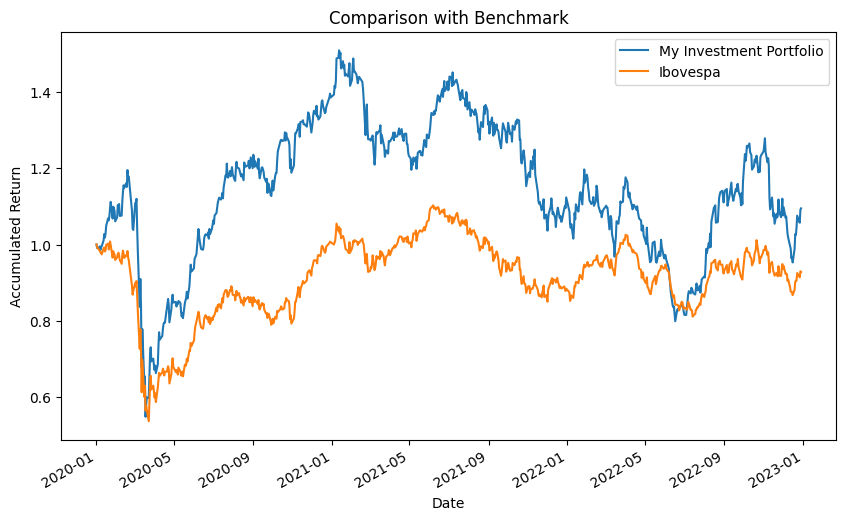

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

def y_date(tickers, y_start, y_end):
    data = yf.download(tickers, start=y_start, end=y_end, progress=False)['Adj Close']
    return data

def track_back(tickers, weights, y_start, y_end):
    data = y_date(tickers, y_start, y_end)
    y_return = data.pct_change()
    y_return_average = (y_return * weights).sum(axis=1)
    investment_port = (1 + y_return_average).cumprod()

    return investment_port

def download_benchmark(ticker, y_start, y_end):
    benchmark = yf.download(ticker, start=y_start, end=y_end, progress=False)['Adj Close']
    benchmark = benchmark / benchmark.iloc[0]
    return benchmark

def compare_with_benchmark(investment_port, benchmark, my_investment_port='Portfolio', name_benchmark='Benchmark'):
    df = pd.DataFrame({my_investment_port: investment_port, name_benchmark: benchmark})
    df.plot(figsize=(10, 6))
    plt.title('Comparison with Benchmark')
    plt.xlabel("Date")
    plt.ylabel('Accumulated Return')
    plt.show()

tickers = ['PETR4.SA', 'POMO4.SA', 'MGLU3.SA', 'WEGE3.SA']
weights = [0.25, 0.25, 0.25, 0.25]

start = datetime(2020, 1, 1)
end = datetime(2023, 1, 1)

investment_port = track_back(tickers, weights, start, end)

ibovespa = download_benchmark('^BVSP', start, end)

compare_with_benchmark(investment_port, ibovespa,
                       my_investment_port='My Investment Portfolio', name_benchmark='Ibovespa')
